<a href="https://colab.research.google.com/github/Boitymellow95/acml-project-loan-prediction-project/blob/musa/loanPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Import data to Google Collab

In [20]:

from google.colab import files
files.upload() 

Saving LoanData.csv to LoanData (1).csv


{'LoanData.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y\

In [21]:
df = pd.read_csv('LoanData.csv')

Display data frame


In [22]:
display(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Make sure Pandas doesn't hide any columns.


In [23]:
pd.set_option("display.max.columns", None)

In [24]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Cleaning and Filling Missing Values

# missing values: check where there's missing values & fix accordingly


In [25]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


the inline backend is popular for Jupyter Notebooks because it displays the plot in the notebook itself, immediately below the cell that creates the plot

In [26]:
 %matplotlib inline

In [27]:
total = df.isnull().sum()

In [28]:
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loans_by_gender = df['Gender'].value_counts()

Text(0.5, 0, 'Loan_Status')

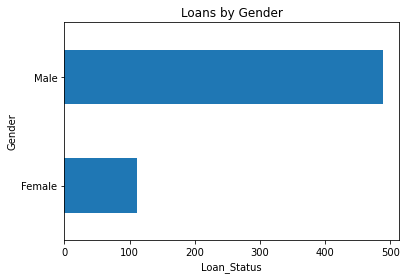

In [30]:
loans_by_gender.sort_values().plot(kind='barh')
plt.title('Loans by Gender')
plt.ylabel('Gender')
plt.xlabel('Loan_Status')

In [31]:
df.Gender = df.Gender.fillna('Male')

In [32]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
df.Married = df.Married.fillna('Yes')

In [34]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [35]:
df.Dependents = df.Dependents.fillna('0')

In [36]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [37]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [38]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna('360.0')

In [40]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [41]:
df.LoanAmount.mean()

146.41216216216213

In [42]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [43]:
df.Credit_History = df.Credit_History.fillna('1.0')

In [44]:
total = df.isnull().sum()

In [45]:
total

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting Categorical Values into Numeric Values (Label Encoding):

In [46]:
from sklearn.preprocessing import LabelEncoder
#var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
var_mod = ['Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,0,5849,0.0,146.412162,360,1,2,1
1,LP001003,Male,Yes,1,0,0,4583,1508.0,128.000000,360,1,0,0
2,LP001005,Male,Yes,0,0,1,3000,0.0,66.000000,360,1,2,1
3,LP001006,Male,Yes,0,1,0,2583,2358.0,120.000000,360,1,2,1
4,LP001008,Male,No,0,0,0,6000,0.0,141.000000,360,1,2,1


In [54]:
# the iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position

x = df.iloc[:,4:12]
y = df.iloc[:,12]


In [55]:
x.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,5849,0.0,146.412162,360,1,2
1,0,0,4583,1508.0,128.000000,360,1,0
2,0,1,3000,0.0,66.000000,360,1,2
3,1,0,2583,2358.0,120.000000,360,1,2
4,0,0,6000,0.0,141.000000,360,1,2


In [56]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Splitting the Data (into training data set and testing data set):

Here the dataset is split into two parts in a ratio of 80:20 

That is: 80% data will be used for model training and 20% for model testing.

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [58]:
x_test

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,0,1,7085,0.0,84.0,360,1,1
52,0,0,4230,0.0,112.0,360,1,1
536,0,0,6133,3906.0,324.0,360,1,2
469,0,0,4333,2451.0,110.0,360,1,2
55,0,0,2708,1167.0,97.0,360,1,1
...,...,...,...,...,...,...,...,...
337,0,1,2500,4600.0,176.0,360,1,0
376,0,0,8750,4996.0,130.0,360,1,0
278,0,0,14583,0.0,436.0,360,1,1
466,1,0,2947,1664.0,70.0,180,0,2


# Building Decision Tree Model:

Here we create a Decision Tree Model using Scikit-Learn

In [59]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree clasifier object
model = DecisionTreeClassifier()

# train decision tree classifier 
model.fit(x_train,y_train)

# predict the response for test dataset
y_predictions = model.predict(x_test)


In [60]:
y_predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [61]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

# Model Evaluation

Here we evaluate how accurate the Classifier or Model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

Model Accuracy is how often is the Classifier correct?

In [62]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predictions)


In [63]:
cnf_matrix

array([[20, 13],
       [22, 68]])

In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predictions))

# Accuracy of Decision Tree Model is lower than that of Logistic Regression!

Accuracy: 0.7154471544715447


# Building Logistic Regression Model

First we import the Logistic Regression Module and create a Logisctic Regression classifier object using LogisticRegression() function.

Then fit the model on the Training set using fit() function and perform prediction on the Test set using predict() function. 

In [65]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_predictions = logistic_regression.predict(x_test)


In [66]:
y_predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

# Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model.

You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [67]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,y_predictions)

print(cnf_matrix)

[[15 18]
 [ 2 88]]


In [80]:
cnf_matrix

array([[15, 18],
       [ 2, 88]])

In [69]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predictions))

# Accuracy of Logistic Regression is higher than that of Decision Tree Model!

Accuracy: 0.8373983739837398


# 2nd Model Evaluation using Confusion Matrix:

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2 * 2 because this model is binary classification. You have two classes 0 and 1. 

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 15 and 88 are actual predictions, and 18 and 2 are incorrect predictions. This means out of 123, we got 103 correct predictions and 20 incorrect predictions.

# Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

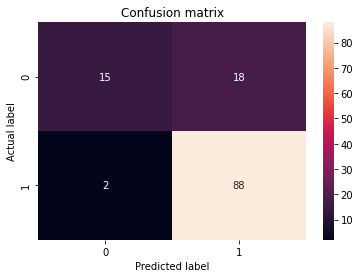

In [70]:
import seaborn as sb

sb.heatmap(cnf_matrix, annot=True)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

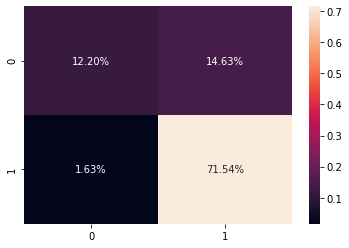

In [71]:
# fmt: string formatting code to use when adding annotations

sb.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%')

# Let's predict whether the Loan will get approved or not for "Michael"

In [77]:
def predictLoanStatus(education, self_employed, applicant_income, secondary_income, loan_amount, loan_term, credit_history, area):
    loanstatus = logistic_regression.predict([[education, self_employed, applicant_income, secondary_income, loan_amount, loan_term, credit_history, area]])
    if (1 in loanstatus):
        print ("Grant the loan to client");
    else :
        print ("Do not grant loan to client");

Perform negative test - client must be declined


In [78]:
predictLoanStatus(1,0,9346,6500,100,36,0.0,2)

Do not grant loan to client


Perform a positive test - client must qualify.

In [79]:
predictLoanStatus(0,1,7085,0.0,84.0,360,1,1)

Grant the loan to client


In [ ]:
# END